In [22]:
%matplotlib inline
from astropy.io.misc.hdf5 import read_table_hdf5
from astropy.table import Table
import h5py
from matplotlib import pyplot as plt
import numpy as np

El archivo `.bpz.h5` contiene algunas estadísticas de resumen de cada redshift fotométrico:

In [29]:
with h5py.File('UDFtest.bpz.h5') as f:
    bpz = Table({key: f.get(key).value for key in f})

/home/cristobal/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.
/home/cristobal/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  


In [30]:
bpz

CHI_SQ,ID,M_0,ODDS,T_B,T_ML,Z_B,Z_B_MAX,Z_B_MIN,Z_ML,Z_S
float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32
0.48541665,3088,22.484,0.70688504,3.0,3.0,0.13,0.45,0.019263955,0.13,0.127
49.88485,8810,22.375,1.0,4.0,4.0,0.71,0.877574,0.542426,0.71,0.736
1.6514437,8461,23.703,0.855209,3.0,3.0,1.5,1.7449913,1.03,1.5,1.426
0.41258305,2225,26.691,1.0,7.0,7.0,5.76,6.4224563,5.0975437,5.76,5.82


Por ejemplo, ``odds`` es una medida de confianza, ``T_B`` y ``Z_B`` son el template y el redshift más probables.

Además, el archivo ``.probs.h5`` contiene las densidades de probabilidad como función del redshift:

In [33]:
with h5py.File('UDFtest.probs.h5') as f:
    probs = {key: f.get(key)[()] for key in f}

/home/cristobal/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [35]:
probs.keys()

dict_keys(['ID', 'PDF', 'ZGRID'])

In [37]:
[f'{key}: {val.shape}' for key, val in probs.items()]

['ID: (4,)', 'PDF: (4, 1000)', 'ZGRID: (1000,)']

Es decir, cada objeto tiene un ID y una lista de probabilidad para cada intervalo de redshift en los valores definidos en ``zgrid``. Así,

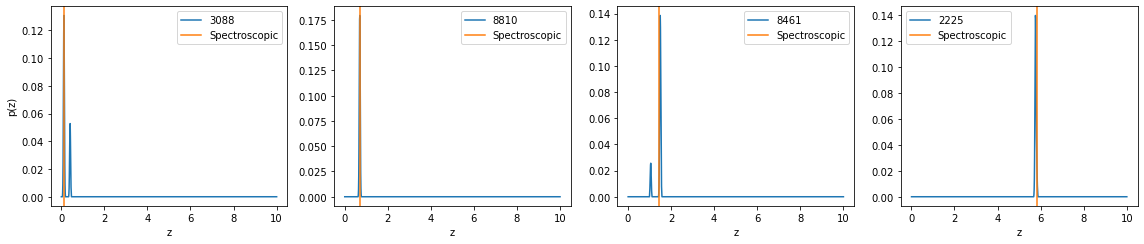

In [46]:
z = probs['ZGRID']
fig, axes = plt.subplots(1, 4, figsize=(16,3.5))
for i, ax in enumerate(axes):
    ax.plot(z, probs['PDF'][i], label=probs['ID'][i])
    ax.axvline(bpz['Z_S'][bpz['ID'] == probs['ID'][i]], color='C1', label='Spectroscopic')
    ax.legend()
    ax.set(xlabel='z')
axes[0].set(ylabel='p(z)')
fig.tight_layout()